# Data exploration

The data is available in Kaggle in the following link:
https://www.kaggle.com/c/plant-pathology-2021-fgvc8/data

In [1]:
%matplotlib inline
import os
import json
import pandas as pd
from pprint import pprint

base_path = 'C:/Users/fabio/Documents/PlantPathology'
train_data = pd.read_csv('C:/Users/fabio/Documents/PlantPathology/train.csv')
print(train_data.head())

                  image                           labels
0  800113bb65efe69e.jpg                          healthy
1  8002cb321f8bfcdf.jpg  scab frog_eye_leaf_spot complex
2  80070f7fb5e2ccaa.jpg                             scab
3  80077517781fb94f.jpg                             scab
4  800cbf0ff87721f8.jpg                          complex


In [2]:
train_data.labels.value_counts()

scab                               4826
healthy                            4624
frog_eye_leaf_spot                 3181
rust                               1860
complex                            1602
powdery_mildew                     1184
scab frog_eye_leaf_spot             686
scab frog_eye_leaf_spot complex     200
frog_eye_leaf_spot complex          165
rust frog_eye_leaf_spot             120
rust complex                         97
powdery_mildew complex               87
Name: labels, dtype: int64

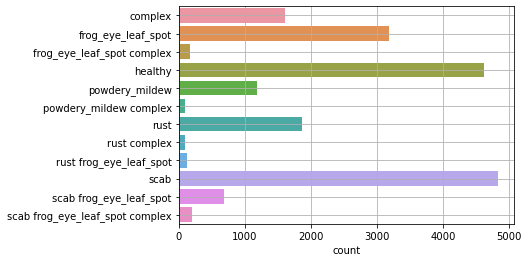

In [3]:
import seaborn as sns
ax = sns.countplot(y = sorted(train_data.labels),orient = 'v')
ax.grid()

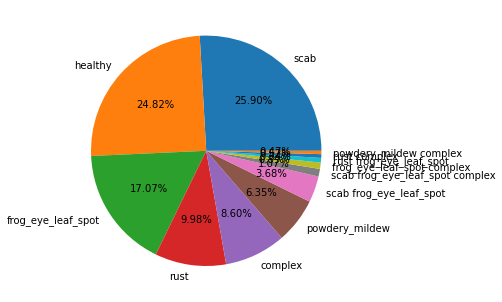

In [4]:
import matplotlib.pyplot as plt
import numpy as np
labels_total = ["scab","healthy","frog_eye_leaf_spot","rust","complex",
          "powdery_mildew","scab frog_eye_leaf_spot","scab frog_eye_leaf_spot complex",
          "frog_eye_leaf_spot complex","rust frog_eye_leaf_spot","rust complex","powdery_mildew complex"]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(train_data.labels.value_counts(),labels = labels_total,autopct='%1.2f%%')
plt.show()

We can notice that the main classes are: "scab","healthy","frog_eye_leaf_spot","rust","complex" and
          "powdery_mildew"

Let's plot a better presentation

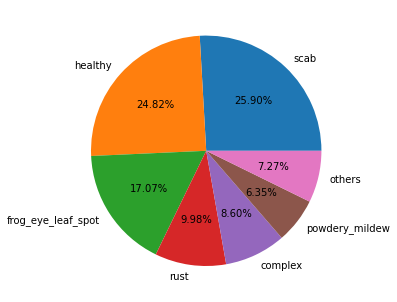

Others:['scab frog_eye_leaf_spot', 'scab frog_eye_leaf_spot complex', 'frog_eye_leaf_spot complex', 'rust frog_eye_leaf_spot', 'rust complex', 'powdery_mildew complex']


In [5]:
#A better presentation
#Dictionary of the classes
labels = ["scab","healthy","frog_eye_leaf_spot","rust","complex",
          "powdery_mildew","others"]
others=["scab frog_eye_leaf_spot","scab frog_eye_leaf_spot complex",
          "frog_eye_leaf_spot complex","rust frog_eye_leaf_spot","rust complex","powdery_mildew complex"]

suma = 0
for value in train_data.labels.value_counts():
    suma += value
#Add only values that percentage are bigger than 4%.
value_counts = [value for value in train_data.labels.value_counts() if value>(4/100*suma)]
#Add the sum of the other values
s = 0
for value in train_data.labels.value_counts():
    if value<(4/100*suma):
        s += value
value_counts.append(s)
    
fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
ax2.pie(value_counts,labels = labels,autopct='%1.2f%%')

plt.show()
print("Others:{}".format(others))

In [6]:
%pylab inline
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

images_csv = pd.read_csv('C:/Users/fabio/Documents/PlantPathology/train.csv')
one_condition = ['scab', 'healthy', 'frog_eye_leaf_spot', 'rust', 'complex', 'powdery_mildew']
images_csv_one_condition = images_csv[images_csv['labels'].isin(one_condition)].reset_index(drop=True)

images_dictionary = {'scab': [], 'healthy': [], 'frog_eye_leaf_spot': [], 'rust': [], 'complex': [], 'powdery_mildew': []}
for index in range(len(images_csv_one_condition)):
    label = images_csv_one_condition.loc[index, 'labels']
    images_dictionary[label].append(images_csv_one_condition.loc[index, 'image'])


path = 'C:/Users/fabio/Documents/PlantPathology/images/'

Populating the interactive namespace from numpy and matplotlib


In [9]:
def plot_image(disease):
    """
    Plotting the 3 first  images of each diseases. Subplot, row = 1, columns = 3.
    args
    disease: str, name of the disease
    return: None
    """
    i = 0
    lista = []
    for image in images_dictionary[disease]:
        if i<3:
            lista.append(image)
            i+=1
    n,j = "13",1
    for img in lista:
        if j<4:
            plt.figure(1)
            plt.suptitle(disease,y=0.7)
            plt.subplot(int(n+str(j)))
            img = mpimg.imread(path+img)
            plt.imshow(img,interpolation='nearest', aspect='equal')
            
            j+=1
    plt.show()

Let's plot 3 images for the main diseases

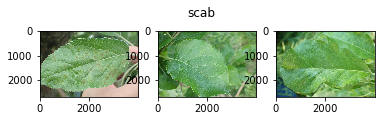

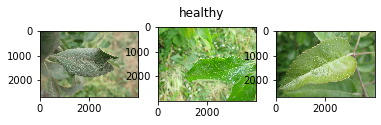

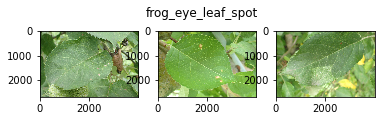

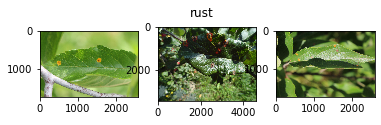

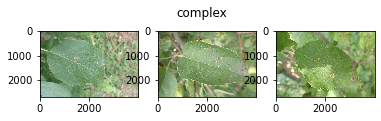

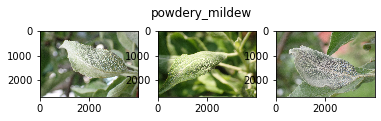

In [10]:
for label in one_condition:
    plot_image(label)